In [3]:
%pip install plotly
%pip install mlxtend
%pip install networkx

                                              0.0/15.6 MB ? eta -:--:--
                                              0.0/15.6 MB ? eta -:--:--
                                              0.1/15.6 MB 1.8 MB/s eta 0:00:09
                                              0.2/15.6 MB 1.7 MB/s eta 0:00:10
                                              0.3/15.6 MB 1.9 MB/s eta 0:00:09
                                              0.3/15.6 MB 1.9 MB/s eta 0:00:09
                                              0.3/15.6 MB 1.9 MB/s eta 0:00:09
                                              0.3/15.6 MB 1.9 MB/s eta 0:00:09
                                              0.3/15.6 MB 1.9 MB/s eta 0:00:09
     -                                        0.5/15.6 MB 1.2 MB/s eta 0:00:13
     -                                        0.7/15.6 MB 1.5 MB/s eta 0:00:10
     --                                       0.9/15.6 MB 1.8 MB/s eta 0:00:09
     ---                                      1.2/15.6 MB 2.2 MB/s


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\LENOVO\anaconda3\envs\tensorflow\python.exe -m pip install --upgrade pip


                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB ? eta -:--:--
     -                                        0.0/1.4 MB 393.8 kB/s eta 0:00:04
     -                                        0.0/1.4 MB 393.8 kB/s eta 0:00:04
     --                                       0.1/1.4 MB 459.5 kB/s eta 0:00:03
     --                                       0.1/1.4 MB 459.5 kB/s eta 0:00:03
     --                                       0.1/1.4 MB 459.5 kB/s eta 0:00:03
     --                         


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\LENOVO\anaconda3\envs\tensorflow\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\LENOVO\anaconda3\envs\tensorflow\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

### <font color="blue">Load Dataset</font>

In [2]:
bakery_df = pd.read_csv('Bakery.csv')
bakery_df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [3]:
bakery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
bakery_df['TransactionNo'].nunique()

9465

In [5]:
bakery_df.describe(include = object)

,Items,DateTime,Daypart,DayType
count,20507,20507,20507,20507
unique,94,9465,4,2
top,Coffee,2017-02-17 14:18:20,Afternoon,Weekday
freq,5471,11,11569,12807


### <font color="blue">Exploratory Data Analysis</font>

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [7]:
item_freq = bakery_df['Items'].value_counts().sort_values(ascending = False)
item_freq = pd.DataFrame({'Item': item_freq.index, 'Frequency': item_freq.values})
item_freq

,Item,Frequency
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
...,...,...
89,Bacon,1
90,Gift voucher,1
91,Olum & polenta,1
92,Raw bars,1


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4236\3032143427.py:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



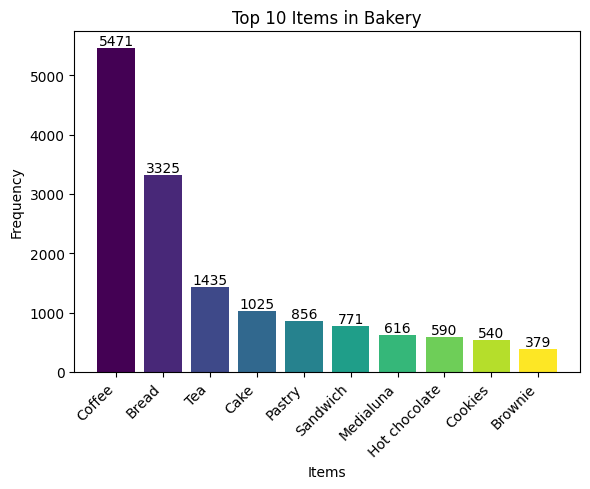

In [9]:
# Assuming top_10_items is your DataFrame
top_10_items = item_freq.head(10)

# Creating the Viridis colormap
viridis_cmap = cm.get_cmap('viridis', len(top_10_items))

# Plotting the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(top_10_items['Item'], top_10_items['Frequency'], color=viridis_cmap(np.arange(len(top_10_items))))

plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 10 Items in Bakery')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility

# Adding count values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
dateTime = pd.to_datetime(bakery_df['DateTime'])
bakery_df['Day']=dateTime.dt.day_name()
bakery_df['Month']=dateTime.dt.month_name()
bakery_df['Year']=dateTime.dt.year
bakery_df.head(5)

,TransactionNo,Items,DateTime,Daypart,DayType,Day,Month,Year
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,Sunday,October,2016
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,Sunday,October,2016
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,Sunday,October,2016
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,Sunday,October,2016
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,Sunday,October,2016


In [11]:
mpd = bakery_df.groupby('Day')['Items'].count().sort_values(ascending=False)
mpd = pd.DataFrame({'Day': mpd.index, 'Frequency': mpd.values})
mpd

,Day,Frequency
0,Saturday,3554
1,Friday,3266
2,Sunday,3118
3,Monday,3035
4,Tuesday,2645
5,Thursday,2601
6,Wednesday,2288


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4236\1503412146.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



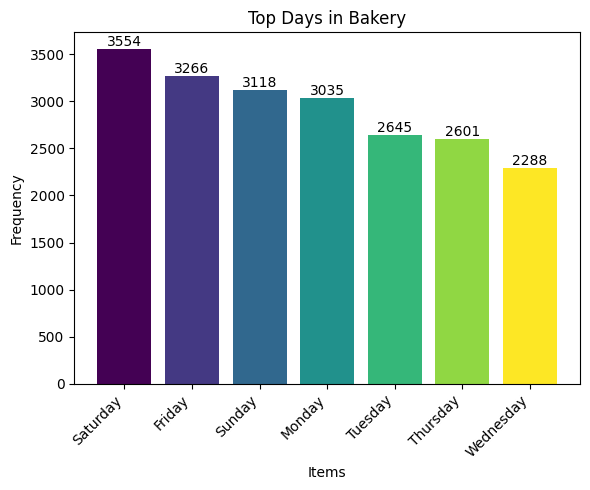

In [12]:
# Creating the Viridis colormap
viridis_cmap = cm.get_cmap('viridis', len(mpd))

# Extracting colors from the Viridis colormap
new_colors = viridis_cmap(np.linspace(0.1, 0.9, len(mpd)))

# Plotting the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(mpd['Day'], mpd['Frequency'], color=new_colors)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top Days in Bakery')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility

# Adding count values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
mpm = bakery_df.groupby('Month')['Items'].count().sort_values(ascending=False)
mpm = pd.DataFrame({'Month': mpm.index, 'Frequency': mpm.values})
mpm

,Month,Frequency
0,March,3220
1,November,3076
2,January,3027
3,February,2748
4,December,2647
5,April,1048
6,October,1041
7,May,924
8,July,741
9,June,739


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4236\1399527606.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



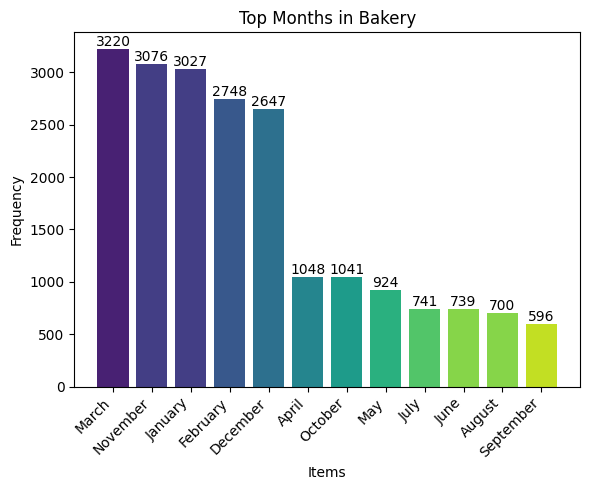

In [14]:
# Creating the Viridis colormap
viridis_cmap = cm.get_cmap('viridis', len(mpm))

# Extracting colors from the Viridis colormap
new_colors = viridis_cmap(np.linspace(0.1, 0.9, len(mpm)))

# Plotting the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(mpm['Month'], mpm['Frequency'], color=new_colors)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top Months in Bakery')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility

# Adding count values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Show the plot
plt.tight_layout()
plt.show()

### <font color="blue">Association Rules Generation</font>

In [15]:
transactions=[]

for item in bakery_df['TransactionNo'].unique():
    lst=list(set(bakery_df[bakery_df['TransactionNo']==item]['Items']))
    transactions.append(lst)

transactions[0:10]

[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Coffee', 'Bread', 'Pastry'],
 ['Medialuna', 'Muffin', 'Pastry'],
 ['Medialuna', 'Coffee', 'Tea', 'Pastry'],
 ['Bread', 'Pastry'],
 ['Muffin', 'Bread'],
 ['Medialuna', 'Scandinavian']]

In [16]:
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
data = pd.DataFrame(encodedData, columns=te.columns_)
data.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
frequent_items= apriori(data, use_colnames=True, min_support=0.02)
frequent_items.head()

,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)


In [18]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Bread,Pastry,0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1,Pastry,Bread,0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,Cake,Tea,0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,Tea,Cake,0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,Cookies,Coffee,0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,Coffee,Cookies,0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
8,Coffee,Hot chocolate,0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
9,Hot chocolate,Coffee,0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


In [21]:
rules_sorted = rules.sort_values(by='confidence', ascending=False)
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,Toast,Coffee,0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
12,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
15,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
11,Juice,Coffee,0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
17,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
3,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
6,Cookies,Coffee,0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
9,Hot chocolate,Coffee,0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
1,Pastry,Bread,0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,Cake,Tea,0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538


C:\Users\LENOVO\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_796\1338795038.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



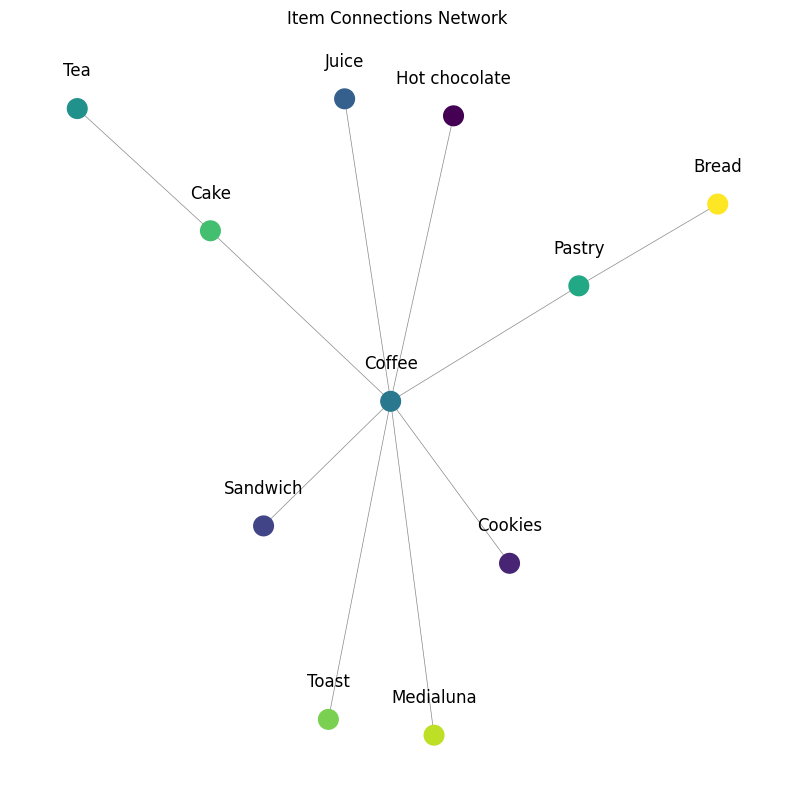

In [28]:
network_A = list(rules["antecedents"].unique())
network_B = list(rules["consequents"].unique())
node_list = list(set(network_A + network_B))
G = nx.Graph()

for i in node_list:
    G.add_node(i)

for i, j in rules.iterrows():
    G.add_edges_from([(j["antecedents"], j["consequents"])])

pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)

# Creating the Viridis colormap
viridis_cmap = cm.get_cmap('viridis', len(G.nodes()))

plt.figure(figsize=(10, 10))

# Draw nodes with Viridis colormap
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=range(len(G.nodes())), cmap=viridis_cmap)

# Draw edges
nx.draw_networkx_edges(G, pos, width=0.5, edge_color='#888')

# Draw labels above the nodes
label_pos = {k: [v[0], v[1] + 0.05] for k, v in pos.items()}  # Adjust the y-coordinate here
nx.draw_networkx_labels(G, label_pos)

plt.title('Item Connections Network')
plt.axis('off')
plt.show()